In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime as dt
import json

%matplotlib inline

In [2]:
endpoint = 'https://data.nashville.gov/resource/fuaa-r5cm.json'

In [3]:
response = requests.get(endpoint)
response

<Response [200]>

In [4]:
result = response.json()

In [5]:
len(result)

1000

In [6]:
# 2016 fire seach endpoint
fire_ep = 'https://data.nashville.gov/resource/fuaa-r5cm.json?query_text=fire&year=2016'

In [7]:
#fire endpoint response
fire_resp = requests.get(fire_ep)
fire_resp

<Response [200]>

In [8]:
# converting fire response into json
fire_result= fire_resp.json()

In [9]:
# pulling out month and query count
search_dict = {}

for line in fire_result:
    month = line.get('month_name')
    count = int(line.get('query_count'))
    if month in search_dict:
        search_dict[month] += count
    else:
        search_dict[month] = count

In [10]:
#converting to dataframe and setting column names
fire_2016_df = pd.DataFrame.from_dict(search_dict, orient = 'index')
fire_2016_df = fire_2016_df.reset_index()
fire_2016_df.columns = ['month','search_count']
fire_2016_df

,month,search_count
0,January,19
1,February,35
2,March,32
3,April,26
4,May,24
5,June,31
6,July,24
7,August,47
8,September,36
9,October,38


##### Question 1. Make an API request that returns the months where "fire" was searched in 2016. Which month had the most searches?  

Answer: August

In [11]:
params_100q_c = { '$where' : 'query_count > 100'}

qry_count_resp = requests.get(endpoint, params = params_100q_c)
qry_count_resp

<Response [200]>

In [12]:
qry_count_result = qry_count_resp.json()

In [13]:
len(qry_count_result)

1000

#### Question 2. Make an API request that returns all the times a query was run more than 100 times in a month. How many times did this occur?  

Answer: 1000

In [14]:
#params for 100 plus queries per month

params_100q = { '$where' : 'query_count > 100',
                'query_text' : 'codes'}

qry_count_code_resp = requests.get(endpoint, params = params_100q)
qry_count_code_resp

<Response [200]>

In [15]:
#converting to json
qry_code_count_result = qry_count_code_resp.json()

In [16]:
#setting up dictionary
query_dict = {}

for lines in qry_code_count_result:
    months = lines.get('month_name')
    counts = int(lines.get('query_count'))
    
    if months in query_dict:
        query_dict[months] += counts
    else:
        query_dict[months] = counts

In [17]:
#turning dictionary into dataframe
qry_count_df = pd.DataFrame.from_dict(query_dict, orient = 'index')
qry_count_df = qry_count_df.reset_index()
qry_count_df.columns = ['month','code_counts']
qry_count_df

,month,code_counts
0,September,696
1,April,741
2,August,1002
3,November,577
4,December,414
5,May,858
6,July,820
7,January,596
8,February,707
9,June,867


In [18]:
#total code counts
len(qry_code_count_result)

56

#### Question 3. Make another API request that returns all the times "codes" was searched more than 100 times in a month. How many times did this occur? 

Answer: 56

#### Question 4. A) Make an API request that returns the entire Top 500 Monthly Searches dataset. 

In [19]:
#parameters for full dataset
params_full_ds = {'$limit' : '50000'}

full_dataset_resp = requests.get(endpoint, params = params_full_ds)
full_dataset_resp

<Response [200]>

In [20]:
full_dataset_result = full_dataset_resp.json()

In [21]:
len(full_dataset_result)

43677

In [22]:
#parameters for maps dataset
params_maps_ds = {'$limit' : '50000',
                  'query_text' : 'maps'}

map_dataset_resp = requests.get(endpoint, params = params_maps_ds)
map_dataset_resp

<Response [200]>

In [23]:
map_searches = map_dataset_resp.json()

In [24]:
len(map_searches)

82

In [25]:
#setting up map dictionary
map_dict = {}

for lines in map_searches:
    months = lines.get('month_name')
    searches = int(lines.get('query_count'))
    
    if months in map_dict:
        map_dict[months] += searches
    else:
        map_dict[months] = searches

In [26]:
#Making maps dataframe
maps_df = pd.DataFrame.from_dict(map_dict, orient = 'index')
maps_df = maps_df.reset_index()
maps_df.columns = ['month','searches']
maps_df

,month,searches
0,January,924
1,February,832
2,March,1090
3,April,1309
4,May,1019
5,June,1216
6,July,1062
7,August,991
8,September,951
9,October,981


#### Question 4. B) Make a chart that shows the number of times "maps" was searched in a month across the entire time frame.

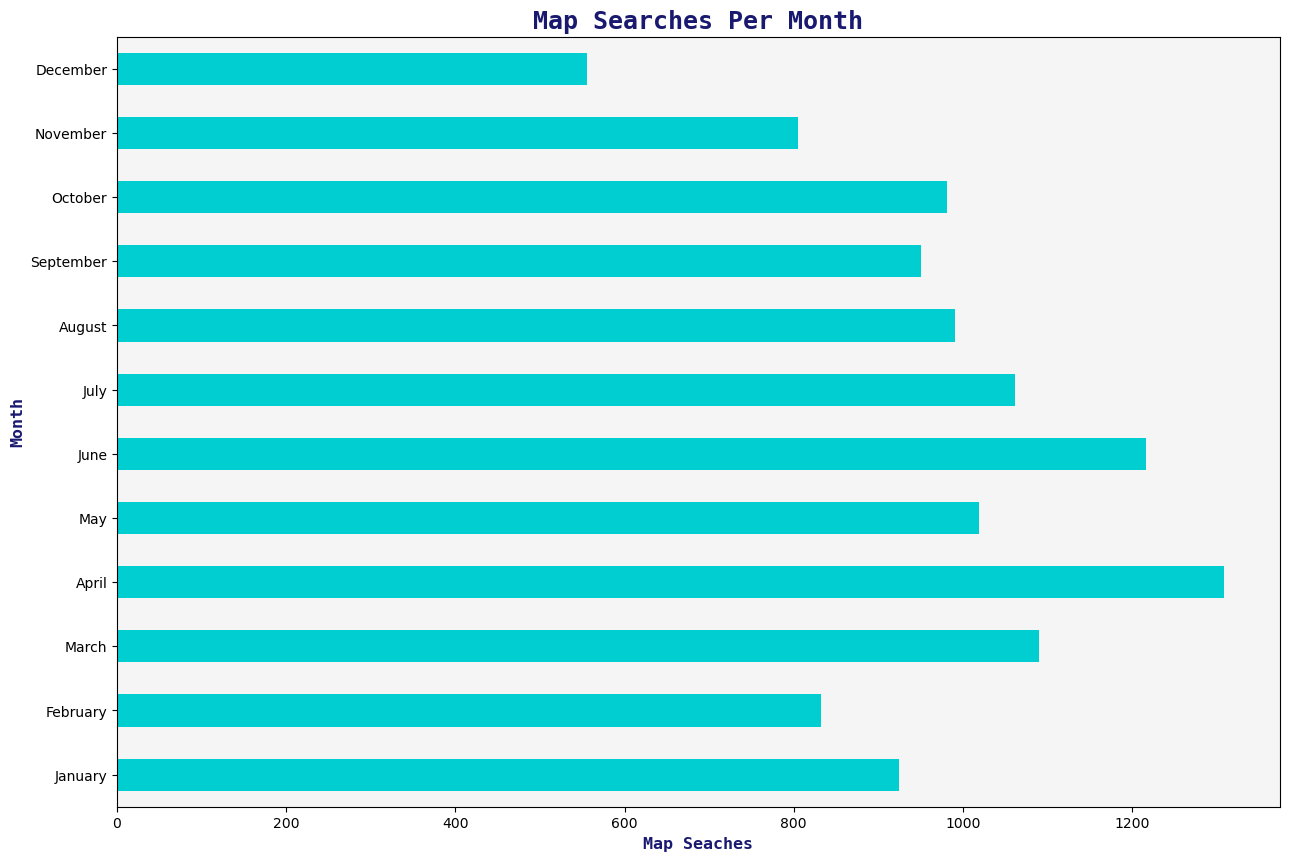

In [27]:
#Horizontal bar plot for map searches per month
font_axes = {'family': 'monospace', 'weight': 'heavy', 'size': 12, 'color' : 'midnightblue'}
font_title = {'family': 'monospace', 'weight': 'heavy', 'size': 18, 'color' : 'midnightblue'}

ax = maps_df.plot.barh(x = 'month',
                       y = 'searches',
                       legend = None,
                       figsize = (15,10),
                       color = ('darkturquoise'))

ax.set_facecolor('whitesmoke')

plt.xlabel('Map Seaches', fontdict = font_axes)
plt.ylabel('Month', fontdict = font_axes)
plt.title('Map Searches Per Month', fontdict = font_title);

In [28]:
hub_endpoint = 'https://data.nashville.gov/resource/7qhx-rexh.json'

In [29]:
#parameters for full hubNashville dataset
params_full_hub = {'$limit' : '1500000'}

full_hub_resp = requests.get(hub_endpoint, params = params_full_hub)
full_hub_resp

<Response [200]>

In [30]:
hub_result = full_hub_resp.json()

In [31]:
len(hub_result)

1067473

In [32]:
len(full_dataset_result)

43677

#### Question 5. Make an API request to pull back all the data from [hubNashville (311) Service Requests](https://data.nashville.gov/Public-Services/hubNashville-311-Service-Requests/7qhx-rexh) (check to see how many rows you can return in a single request). Compare it to the Top 500 Monthly Searches data set. What do you observe? (This is open-ended, there isn't a specific answer for this one) 

Answer: Not only is the hubNashville data set significantly larger with entries but there are also a significant amount more criteria to search on.

#### Question 6. Find 2 new data sets on data.nashville.gov, make API requests to pull the data, and do an analysis that combines the data sets.

Answer: I chose the fire stations and fire active incidents data sets to see what stations reported to what incidents based on zip codes along with the types of units dispatched to each incident.

In [33]:
#fire stations endpoint API
fire_stat_endpoint = 'https://data.nashville.gov/resource/frq9-a5iv.json'

In [34]:
#parameters for pulling in entire dataset for fire stations and response code check
params_fire_st = {'$limit': '100'}

fire_st_resp = requests.get(fire_stat_endpoint, params = params_fire_st)
fire_st_resp

<Response [200]>

In [35]:
#turning fire station response into json
fire_stations = fire_st_resp.json()

In [36]:
#checking length of fire station set
len(fire_stations)

39

In [37]:
#fire incident response API
fire_inc_endpoint = 'https://data.nashville.gov/resource/jwgg-8gg4.json'

In [38]:
#parameters for pulling in entire dataset for fire incidents set and response code check
params_fire_inc = {'$limit': '100'}

fire_inc_resp = requests.get(fire_inc_endpoint, params = params_fire_inc)
fire_inc_resp

<Response [200]>

In [39]:
#turning fire incident response into json
fire_incidents = fire_inc_resp.json()

In [40]:
#checking length of fire incidents
len(fire_incidents)

46

In [41]:
#dataframe for fire stations
fire_station_df = pd.DataFrame(fire_stations, columns = {'station_number','street_address','city','zip_code'})
fire_station_df = fire_station_df.rename(columns = {'station_number':'station','street_address':'address',
                                                    'zip_code':'zip'})
fire_station_df = fire_station_df[['station','zip','city']]
fire_station_df.head()

,station,zip,city
0,Station 1,37207,Nashville
1,Station 10,37211,Nashville
2,Station 11,37208,Nashville
3,Station 12,37210,Nashville
4,Station 13,37209,Nashville


In [42]:
#dataframe for fire incidents
fire_inc_df = pd.DataFrame(fire_incidents)
fire_inc_df = fire_inc_df.rename(columns = {'postal_code':'zip','incident_type':'incident','incident_number':'incident_id'})
fire_inc_df[['date','time']]= fire_inc_df['dispatch_time'].str.split('T',expand = True)
fire_inc_df = fire_inc_df[['incident','incident_id','zip','date','time','units_dispatched']]

fire_inc_df.head()

,incident,incident_id,zip,date,time,units_dispatched
0,MVA,FFD22111700145527,37076,2022-11-17,15:38:24.300,EN32
1,MVA,FFD22111700145527,37076,2022-11-17,15:38:24.300,TR28
2,MVA,FFD22111700145527,37076,2022-11-17,15:38:24.300,MED32
3,BREATHING,FFD22111700145526,37115,2022-11-17,15:37:07.980,EN31
4,BREATHING,FFD22111700145526,37115,2022-11-17,15:37:07.980,MED31


In [43]:
fire_inc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   incident          46 non-null     object
 1   incident_id       46 non-null     object
 2   zip               46 non-null     object
 3   date              46 non-null     object
 4   time              46 non-null     object
 5   units_dispatched  46 non-null     object
dtypes: object(6)
memory usage: 2.3+ KB


In [44]:
#converting time column to datetime
fire_inc_df['time'] = pd.to_datetime(fire_inc_df['time'])
fire_inc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   incident          46 non-null     object        
 1   incident_id       46 non-null     object        
 2   zip               46 non-null     object        
 3   date              46 non-null     object        
 4   time              46 non-null     datetime64[ns]
 5   units_dispatched  46 non-null     object        
dtypes: datetime64[ns](1), object(5)
memory usage: 2.3+ KB


In [45]:
#changing time format
fire_inc_df['time']= fire_inc_df['time'].dt.strftime('%H:%M')
fire_inc_df.head()

,incident,incident_id,zip,date,time,units_dispatched
0,MVA,FFD22111700145527,37076,2022-11-17,15:38,EN32
1,MVA,FFD22111700145527,37076,2022-11-17,15:38,TR28
2,MVA,FFD22111700145527,37076,2022-11-17,15:38,MED32
3,BREATHING,FFD22111700145526,37115,2022-11-17,15:37,EN31
4,BREATHING,FFD22111700145526,37115,2022-11-17,15:37,MED31


In [46]:
#merging fire station and fire incident dataframes
fire_dept_activity = fire_station_df.merge(fire_inc_df, on = 'zip', how = 'inner')
fire_dept_activity.head()

,station,zip,city,incident,incident_id,date,time,units_dispatched
0,Station 10,37211,Nashville,MVAROLL,FFD22111700145516,2022-11-17,15:21,EN06
1,Station 10,37211,Nashville,MVA,FFD22111700145518,2022-11-17,15:21,MED33
2,Station 10,37211,Nashville,PSYCH,FFD22111700145519,2022-11-17,15:16,MED12
3,Station 10,37211,Nashville,PSYCH,FFD22111700145519,2022-11-17,15:16,EN26
4,Station 10,37211,Nashville,MVAROLL,FFD22111700145516,2022-11-17,15:14,MED10
